# Case Study 3 : Data Science in NYC Taxi and Uber Data

**Required Readings:** 
* [Analyzing 1.1 Billion NYC Taxi and Uber Trips](http://toddwschneider.com/posts/analyzing-1-1-billion-nyc-taxi-and-uber-trips-with-a-vengeance/) 
* Please download the NYC taxi and Uber dataset from [here](https://github.com/toddwschneider/nyc-taxi-data).
* [TED Talks](https://www.ted.com/talks) for examples of 10 minutes talks.


** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem: pick a data science problem that you plan to solve using Uber/Taxi Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

* Uber and its drivers would like to increase their revenue generation and meet their customers expectations of Uber availability. 
* The project aims to use Uber/Taxi pickup location data to analyze the most popular areas in NYC where drivers could have a larger chance to business opportunity.
























# Data Collection/Processing: 

In [1]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#Import the data
import pandas as pd
import pandasql
from pandasql import sqldf
import csv

#setup to use SQL for querying
pysqldf = lambda q: sqldf(q, globals())

#Load taxi zone lookup info
filename = 'taxi+_zone_lookup.csv'
TZL =pd.read_csv(filename, sep=',')

#Load taxi and Uber trips

FTD201701 = pd.read_csv('fhv_tripdata_2017-01.csv', sep=',', nrows = 200000)
FTD201702 = pd.read_csv('fhv_tripdata_2017-02.csv', sep=',', nrows = 200000)
FTD = pd.read_csv('fhv_tripdata_2016-12.csv', sep=',', nrows = 200000, parse_dates = True)

#add identifying ride type to each file
FTD = FTD.assign(ride='FTD')
FTD201701 = FTD201701.assign(ride='FTD')
FTD201702 = FTD201702.assign(ride='FTD')


print 'Completed loading data'

Completed loading data


In [2]:
#rename columns so they are easier to query
xFTD = FTD.rename(index=str,columns={'Pickup_date': 'PUDat',
                                'Dispatching_base_num': 'VenID',
                                'locationID': 'PUID'})
xFTD201701 = FTD201701.rename(index=str,columns={'Pickup_DateTime': 'PUDat',
                                'Dispatching_base_num': 'VenID',
                                'PUlocationID': 'PUID'})
xFTD201702 = FTD201702.rename(index=str,columns={'Pickup_DateTime': 'PUDat',
                                'Dispatching_base_num': 'VenID',
                                'PUlocationID': 'PUID'})


In [3]:
#Make the dataset date/time friendly
xFTD['PUDat'] =  pd.to_datetime(xFTD['PUDat'])
xFTD201701['PUDat'] =  pd.to_datetime(xFTD201701['PUDat'])
xFTD201702['PUDat'] =  pd.to_datetime(xFTD201702['PUDat'])


In [4]:
#extract the hour from the Pickup datetime stamp as a string so that the query can group on it
def hr_func(ts):
    return str(ts.hour)

xFTD['PUhour'] = xFTD['PUDat'].apply(hr_func)
xFTD201701['PUhour'] = xFTD201701['PUDat'].apply(hr_func)
xFTD201702['PUhour'] = xFTD201702['PUDat'].apply(hr_func)

In [5]:
#Summarize FTD data and output to csv file
q = """SELECT ride, VenID, PUID, PUhour, count(ride) as 'tot_rides'
     FROM
        xFTD
    group by ride, VenID, PUID, PUhour
    ;"""
SumFTD = pysqldf(q)


q = """SELECT ride, VenID, PUID, PUhour, tot_rides, borough, service_zone
     FROM
        SumFTD
        INNER JOIN
        TZL
           ON SumFTD.PUID = TZL.LocationID
    ;"""

ZoneSumFTD = pysqldf(q)

ZoneSumFTD.to_csv('201612_ZoneSumFTD.csv')

In [6]:
#Summarize 201701 FTD data and output to csv file


q = """SELECT *
     FROM
        xFTD201701
        ;"""
test = pysqldf(q)

q = """SELECT ride, VenID, PUID, PUhour, count(ride) as 'tot_rides'
     FROM
        xFTD201701
    group by ride, VenID, PUID, PUhour
    ;"""
SumFTD201701 = pysqldf(q)

q = """SELECT ride, VenID, PUID, PUhour, tot_rides, borough, service_zone
     FROM
        SumFTD201701
        INNER JOIN
        TZL
           ON SumFTD201701.PUID = TZL.LocationID
    ;"""

ZoneSumFTD201701 = pysqldf(q)
ZoneSumFTD201701.to_csv('201701_ZoneSumFTD.csv')

In [7]:
#Summarize 201702 FTD data and output to csv file
q = """SELECT ride, VenID, PUID, PUhour, count(ride) as 'tot_rides'
     FROM
        xFTD201702
    group by ride, VenID, PUID, PUhour
    ;"""
SumFTD201702 = pysqldf(q)

q = """SELECT ride, VenID, PUID, PUhour, tot_rides, borough, service_zone
     FROM
        SumFTD201702
        INNER JOIN
        TZL
           ON SumFTD201702.PUID = TZL.LocationID
    ;"""

ZoneSumFTD201702 = pysqldf(q)

ZoneSumFTD201702.to_csv('201702_ZoneSumFTD.csv')

In [8]:
q = """SELECT ride, VenID, PUID, PUhour, count(ride) as 'tot_rides'
     FROM
        xFTD201702
    group by ride, VenID, PUID, PUhour
    ;"""
CTFTD201702 = pysqldf(q)


# Data Exploration: Exploring the Uber/Taxi Dataset

** plot the spatial distribution of the pickup locations of 5000 Uber trips** 
* collect a set of 5000 Uber trips
* plot the distribution of the pickup locations using a scatter plot figure.

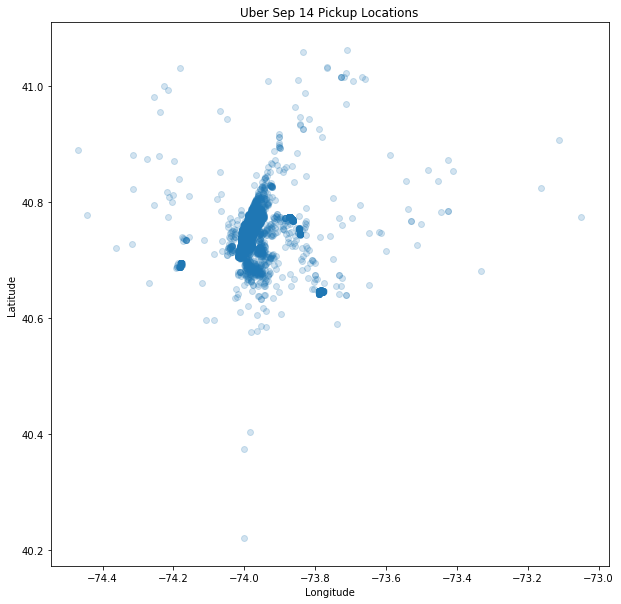

In [1]:
# The scatter plot of 5000 uber trip pickup locations on NYC area
# Data used to generate the plot is of Uber data in Sept 2014


import matplotlib.pyplot as plt
import pandas as pd

uber_data = pd.read_csv("./uber_sep14.csv")
plt.figure(figsize=(10, 10))
plt.scatter(uber_data.Lon[:5000], uber_data.Lat[:5000], alpha=0.2)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Uber Sep 14 Pickup Locations")
plt.show()

In [10]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


# For the real problem, uber data set at Jan 2017 and Feb 2017 are used
import matplotlib.pyplot as plt
import pandas as pd

uber_2017_01 = pd.read_csv("./fhv_tripdata_2017-01.csv")



In [18]:
# Drop null values where pickup location ids are missing

uber_2017_01_clear = uber_2017_01.dropna(axis=0, how='all', subset=['PUlocationID'])

In [55]:
uber_2017_01_clear = uber_2017_01_clear.drop(['DropOff_datetime', 'DOlocationID'], axis=1)

In [63]:
uber_2017_01_clear['Pickup_DateTime'] = pd.to_datetime(uber_2017_01_clear['Pickup_DateTime'])
uber_2017_01_clear['hour'] = [x.hour for x in uber_2017_01_clear['Pickup_DateTime']]

In [23]:
taxi_zone_lookup = pd.read_csv("./taxi_zone_lookup.csv")

In [65]:
pick_up_freq = uber_2017_01_clear.merge(taxi_zone_lookup[['location_id', 'borough']], 
                                        how='left', 
                                        right_on='location_id', 
                                        left_on='PUlocationID')



In [78]:
result_uber_2017_01 = pick_up_freq.groupby(['hour', 'borough'])['Dispatching_base_num'].count().to_frame('Frequency')

In [80]:
result_uber_2017_01.reset_index(inplace=True)

In [82]:
result_uber_2017_01.to_csv('result_uber_2017_01.csv')

In [83]:
uber_2017_02 = pd.read_csv("./fhv_tripdata_2017-02.csv")
uber_2017_02_clear = uber_2017_02.dropna(axis=0, how='all', subset=['PUlocationID'])
uber_2017_02_clear = uber_2017_02_clear.drop(['DropOff_datetime', 'DOlocationID'], axis=1)



In [84]:
uber_2017_02_clear['Pickup_DateTime'] = pd.to_datetime(uber_2017_02_clear['Pickup_DateTime'])
uber_2017_02_clear['hour'] = [x.hour for x in uber_2017_02_clear['Pickup_DateTime']]
pick_up_freq2 = uber_2017_02_clear.merge(taxi_zone_lookup[['location_id', 'borough']], 
                                        how='left', 
                                        right_on='location_id', 
                                        left_on='PUlocationID')

In [89]:
result_uber_2017_02 = pick_up_freq2.groupby(['hour', 'borough'])['Dispatching_base_num'].count().to_frame('Frequency')

In [90]:
result_uber_2017_02.reset_index(inplace=True)
result_uber_2017_02.to_csv('result_uber_2017_02.csv')

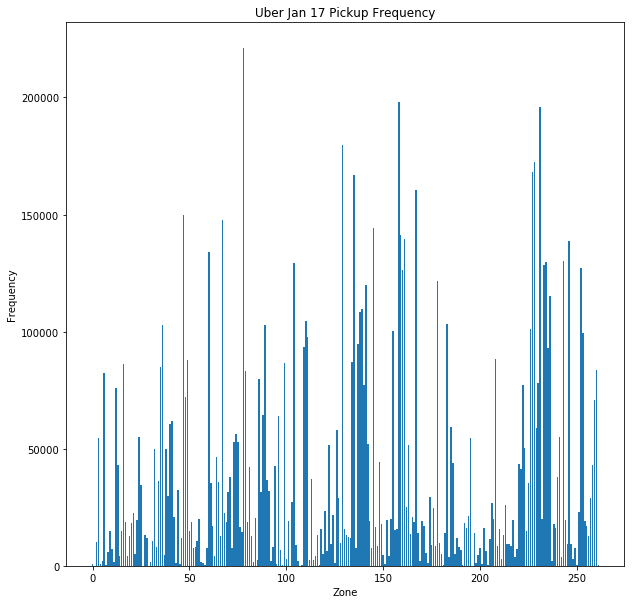

In [49]:
# plt.figure(figsize=(10, 10))
# plt.bar(result_sort.index, result_sort['frequency'])
# plt.xlabel("Zone")
# plt.ylabel("Frequency")
# plt.title("Uber Jan 17 Pickup Frequency")
# plt.show()

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

* Predict the distribution of Uber pickups by month, time of day,  and location time can effectively guide Uber to distribute drivers optimally.
* Use 1 month as a “training” set
* Use another month(s) as test set(s)












Write codes to implement the solution in python:

In [9]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

print type(ZoneSumFTD201702)
print list(ZoneSumFTD201702)

<class 'pandas.core.frame.DataFrame'>
[u'ride', u'VenID', u'PUID', u'PUhour', u'tot_rides', u'Borough', u'service_zone']


In [10]:
#Summarize pickup hours by borough for Jan (train) and Feb 2017 (test)
HrsByBorough201702 = pd.crosstab(ZoneSumFTD201702.PUhour, ZoneSumFTD201702.Borough)
HrsByBorough201701 = pd.crosstab(ZoneSumFTD201701.PUhour, ZoneSumFTD201702.Borough)
print HrsByBorough201702, '\n'
print HrsByBorough201701

##look for an increase in volume from hour to hour by location

Borough  Bronx  Brooklyn  EWR  Manhattan  Queens  Staten Island  Unknown
PUhour                                                                  
0          276       639    0       1091     430             17       10
1          183       529    0        826     299             16        6
10         372       964    1       1310     677             69       17
11         341       891    1       1269     619             62       18
12         355       892    0       1282     644             61       19
13         364       873    0       1312     648             60       11
14          15        54    0          6      29              0        4
2          109       372    0        653     238             13        5
3          106       310    0        502     224             10        6
4          136       346    0        613     302             13        9
5          183       531    0        845     416             18       15
6          318       770    1       1171     566   

# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


In [11]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


# Drawing the heatmap by using Google Cloud Platform

# function to get the latitude and longitude from location name
import urllib  
import json

# please use your own api key, which can apply on the Google Cloud Platform Website https://cloud.google.com/
key = "AIxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
  
def getGeoForAddress(address):   
    addressUrl = "https://maps.googleapis.com/maps/api/geocode/json?address=%s&key=%s" % (address, key)
    req = urllib.urlopen(addressUrl)
    response = req.read()
#     print response
    responseJson = json.loads(response)
    lat = responseJson.get('results')[0]['geometry']['location']['lat']  
    lng = responseJson.get('results')[0]['geometry']['location']['lng']  
#     print(address + ' is at %f, %f'  %(lat, lng))  
    return [lat, lng]

In [12]:
#Summarize 201702 data and output to csv file by zone
q = """SELECT ride, VenID, PUID, PUhour, count(ride) as 'tot_rides'
     FROM
        xFTD201702
    group by ride, VenID, PUID, PUhour
    ;"""
SumFTD201702_byzone = pysqldf(q)

q = """SELECT ride, VenID, PUID, PUhour, tot_rides, Zone, service_zone
     FROM
        SumFTD201702_byzone
        INNER JOIN
        TZL
           ON SumFTD201702_byzone.PUID = TZL.LocationID
    ;"""

ZoneSumFTD201702_byzone = pysqldf(q)
ZoneSumFTD201702_byzone.to_csv('201702_ZoneSumFTD_byZone.csv')

In [13]:
print type(ZoneSumFTD201702_byzone)
print list(ZoneSumFTD201702_byzone)

<class 'pandas.core.frame.DataFrame'>
[u'ride', u'VenID', u'PUID', u'PUhour', u'tot_rides', u'Zone', u'service_zone']


In [1]:
# Get Location Latitude and Longitude
Zone_Loc = {}

for item in TZL.Zone:
    if item != "Queensbridge/Ravenswood" and item != "NA" and item != "NV":
        Zone_Loc[item] = getGeoForAddress(item)  

print len(Zone_Loc)

261


In [2]:
# Write the location Latitude and Longitude into the file
with open('Location.csv', 'wb') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in Zone_Loc.items():
        writer.writerow([key, value[0],value[1]])

print("Location Information Output Succeed!")

Location Information Output Succeed!


In [3]:
# Read the location file
filename = 'Location.csv'
Loc =pd.read_csv(filename, sep=',')

print("Read Location: Done")

Read Location: Done


In [5]:
# Export the zone and Loc Information to the file
q = """SELECT ride, VenID, PUID, PUhour, tot_rides, Zone, service_zone
     FROM
        SumFTD201702_byzone
        INNER JOIN
        TZL
           ON SumFTD201702_byzone.PUID = TZL.LocationID
    ;"""

ZoneSumFTD201702_byzone_all = pysqldf(q)

q = """SELECT Loc.Zone, Loc.Lat, Loc.Lng
     FROM
        ZoneSumFTD201702_byzone_all, Loc
    WHERE
        ZoneSumFTD201702_byzone_all.Zone = Loc.Zone
    ;"""

LocSumFTD201702_byzone_all = pysqldf(q)
LocSumFTD201702_byzone_all.to_csv('LocSumFTD201702_byzone_all.csv')

print ("The Zone and Loc information of all PUhour in 201702 is exported Successfully!")

The Zone and Loc information of all PUhour in 201702 is exported Successfully!


In [6]:
# draw the heatmap using the Google Cloud Platform
import gmplot

filename = 'LocSumFTD201702_byzone_all.csv'
csvfile = file(filename, 'rb')
reader = csv.reader(csvfile)

Lats = []
Lngs = []
ct = 0
for line in reader:
    if ct != 0:
        Lats.append(float(line[2]))
        Lngs.append(float(line[3]))
#         print line[2]
    ct+=1


NY = getGeoForAddress("New York")
gmap = gmplot.GoogleMapPlotter(NY[0], NY[1], 11)
gmap.heatmap(Lats, Lngs, threshold=1, radius = 120, opacity = 0.9)

gmap.draw("new york_201702.html")
print ("Map HTML is exported successfully!")

Map HTML is exported successfully!


*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . Each team present their case studies in class for 10 minutes.

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through Canvas, in the Assignment "Case Study 4".
        
** Note: Each team only needs to submit one submission in Canvas **


# Peer-Review Grading Template:

** Total Points: (100 points) ** Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.

Please add an "**X**" mark in front of your rating: 

For example:

*2: bad*
          
**X** *3: good*
    
*4: perfect*


    ---------------------------------
    The Problem: 
    ---------------------------------
    
    1. (10 points) how well did the team describe the problem they are trying to solve using the data? 
       0: not clear
       2: I can barely understand the problem
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
    
    2. (10 points) do you think the problem is important or has a potential impact?
        0: not important at all
        2: not sure if it is important
        4: seems important, but not clear
        6: interesting problem
        8: an important problem, which I want to know the answer myself
       10: very important, I would be happy invest money on a project like this.
    
    ----------------------------------
    Data Collection and Processing:
    ----------------------------------
    
    3. (10 points) Do you think the data collected/processed are relevant and sufficient for solving the above problem? 
       0: not clear
       2: I can barely understand what data they are trying to collect/process
       4: I can barely understand why the data is relevant to the problem
       6: the data are relevant to the problem, but better data can be collected
       8: the data collected are relevant and at a proper scale
      10: the data are properly collected and they are sufficient

    -----------------------------------
    Data Exploration:
    -----------------------------------
    4. How well did the team solve the following task:
    
    (1) plot the spatial distribution of the pickup locations of 5000 Uber trips (10 points):
       0: missing answer
       4: okay, but with major problems
       7: good, but with minor problems
      10: perfect
    

    -----------------------------------
    The Solution
    -----------------------------------
    5.  how well did the team describe the solution they used to solve the problem? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
       10: crystal clear
       
    6. how well is the solution in solving the problem? (10 points)
       0: not relevant
       2: barely relevant to the problem
       4: okay solution, but there is an easier solution.
       6: good, but can be improved
       8: very good, but solution is simple/old
       10: innovative and technically sound
       
    7. how well did the team implement the solution in python? (10 points)
       0: the code is not relevant to the solution proposed
       2: the code is barely understandable, but not relevant
       4: okay, the code is clear but incorrect
       6: good, the code is correct, but with major errors
       8: very good, the code is correct, but with minor errors
      10: perfect 
   
    -----------------------------------
    The Results
    -----------------------------------
     8.  How well did the team present the results they found in the data? (10 points)
       0: not clear
       2: I can barely understand
       4: okay, can be improved
       6: good, but can be improved
       8: very good
      10: crystal clear
       
     9.  How do you think of the results they found in the data?  (5 points)
       0: not clear
       1: likely to be wrong
       2: okay, maybe wrong
       3: good, but can be improved
       4: make sense, but not interesting
       5: make sense and very interesting
     
    -----------------------------------
    The Presentation
    -----------------------------------
    10. How all the different parts (data, problem, solution, result) fit together as a coherent story?  
       0: they are irrelevant
       1: I can barely understand how they are related to each other
       2: okay, the problem is good, but the solution doesn't match well, or the problem is not solvable.
       3: good, but the results don't make much sense in the context
       4: very good fit, but not exciting (the storyline can be improved/polished)
       5: a perfect story
      
    11. Did the presenter make good use of the 10 minutes for presentation?  
       0: the team didn't present
       1: bad, barely finished a small part of the talk
       2: okay, barely finished most parts of the talk.
       3: good, finished all parts of the talk, but some part is rushed
       4: very good, but the allocation of time on different parts can be improved.
       5: perfect timing and good use of time      

    12. How well do you think of the presentation (overall quality)?  
       0: the team didn't present
       1: bad
       2: okay
       3: good
       4: very good
       5: perfect


    -----------------------------------
    Overall: 
    -----------------------------------
    13. How many points out of the 100 do you give to this project in total?  Please don't worry about the absolute scores, we will rescale the final grading according to the performance of all teams in the class.
    Total score:
    
    14. What are the strengths of this project? Briefly, list up to 3 strengths.
       1: 
       2:
       3:
    
    15. What are the weaknesses of this project? Briefly, list up to 3 weaknesses.
       1:
       2:
       3:
    
    16. Detailed comments and suggestions. What suggestions do you have for this project to improve its quality further.
    
    
    

    ---------------------------------
    Your Vote: 
    ---------------------------------
    1. [Overall Quality] Between the two submissions that you are reviewing, which team would you vote for a better score?  (5 bonus points)
        0: I vote the other team is better than this team
        5: I vote this team is better than the other team 
        
    2. [Presentation] Among all the teams in the presentation, which team do you think deserves the best presentation award for this case study?  
        1: Team 1
        2: Team 2
        3: Team 3
        4: Team 4
        5: Team 5
        6: Team 6
        7: Team 7
        8: Team 8
        9: Team 9


